In [1]:
import torch as torch

from src.utils import get_dataset

class args:
    def __init__(self):
        self.num_channels = 1
        self.iid = 1
        self.num_classes = 10
        self.num_users = 10
        self.dataset = 'mnist'

train_dataset, test_dataset, user_groups = get_dataset(args())

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         1., 0., 1., 1., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
  

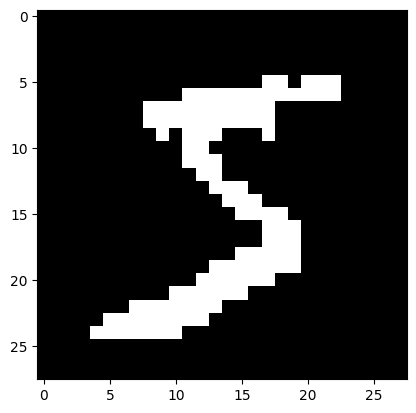

In [2]:
import matplotlib.pyplot as plt
plt.imshow(train_dataset[0][0][0], cmap='gray')

print(train_dataset[0][0][0])

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         1., 0., 1., 1., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
  

KeyboardInterrupt: 

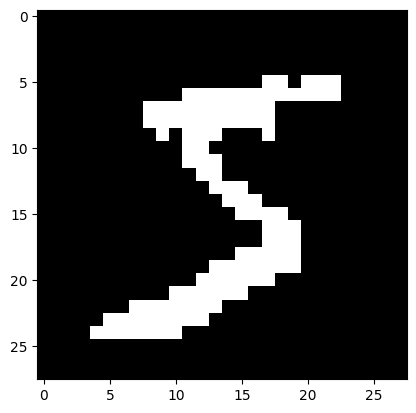

In [3]:
from src.vae.mnist_vae import ConditionalVae
import matplotlib.pyplot as plt
# Train a VAE using normalized MNIST

## Get real data loaded

plt.imshow(train_dataset[0][0][0], cmap='gray')

print(train_dataset[0][0][0])
# Use VAE to generate some data
vae = ConditionalVae(dim_encoding=3).to('cuda:0')

# try with model sigma
vae_model, vae_loss_li, kl_loss_li = vae.train_model(
    training_data=train_dataset,
    batch_size=32,
    epochs=10,
    learning_rate=0.001
)

# Compare generated data with real data

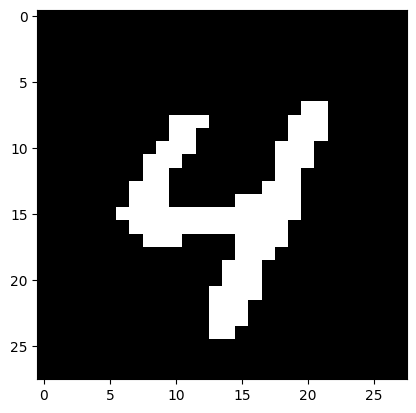

In [4]:
from src.plots import plot_image
from src.impute import impute_cvae_naive
from src.vae.mnist_vae import ConditionalVae

vae_model = ConditionalVae(dim_encoding=3)
checkpoint = torch.load("C:\\Users\\LohithSai\\Desktop\\FederatedImputation\\vae_data\\models\\0_cvae_0.1_cvae.pth")
vae_model.load_state_dict(checkpoint)

images = impute_cvae_naive(k=2, trained_cvae = vae_model, initial_dataset = torch.tensor([]))
plt.imshow((images[1][0][0]), cmap='gray')
plt.show()

# print(images[0][0].max().item())

In [43]:
print((images[0][0][0]).max().item())
# plt.imshow((images[1][0]*200), cmap='gray')

0.1696428507566452


In [44]:
print(train_dataset[3][0][0].max().item())
# plt.imshow(train_dataset[1][0][0], cmap='gray')


0.14158163964748383


In [5]:
import torch
from src.impute import impute_cvae_naive
# Load cvae that is trained federatedly
vae_model = ConditionalVae(dim_encoding=3)
checkpoint = torch.load("C:\\Users\\LohithSai\\Desktop\\FederatedImputation\\vae_data\\models\\0_cvae_0.1_cvae.pth")
vae_model.load_state_dict(checkpoint)
gen_dataset = impute_cvae_naive(k=70000, trained_cvae = vae_model, initial_dataset = torch.tensor([]))

In [6]:
gen_dataset[0][0][0]

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
  

In [7]:
import numpy as np
total_len = 0
total_sum = 0
for images, _ in gen_dataset:
    total_sum += images.sum().item()
    total_len += np.prod(images.shape)

mean_value = total_sum/total_len

print("The mean pixel value is:", mean_value)


The mean pixel value is: 0.1345065415451895


In [8]:
import numpy as np
total_len = 0
total_sum = 0
for images, _ in train_dataset:
    total_sum += images.sum().item()
    total_len += np.prod(images.shape)

mean_value = total_sum/total_len

print("The mean pixel value is:", mean_value)


The mean pixel value is: 0.13225831207482994


In [9]:
import pickle

with open('filename_test.pkl', 'wb') as f:
    pickle.dump(gen_dataset, f)


In [15]:
import pickle
with open('C:\\Users\\LohithSai\\Desktop\\FederatedImputation\\src\\datasets\\gen_dataset_1.0.pkl', 'rb') as f:
    loaded_object = pickle.load(f)


0
1.0


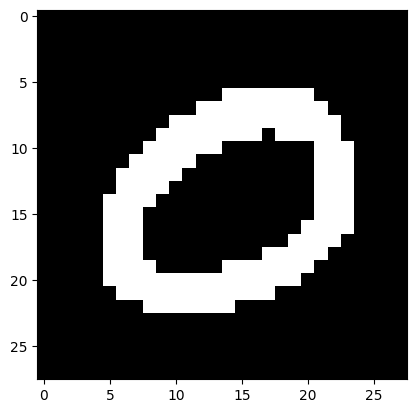

7
1.0


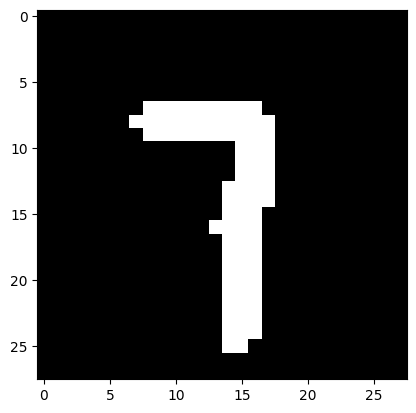

9
1.0


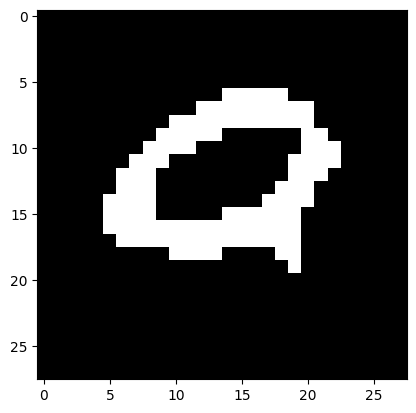

9
1.0


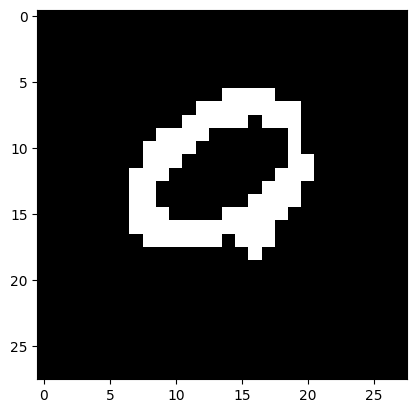

4
1.0


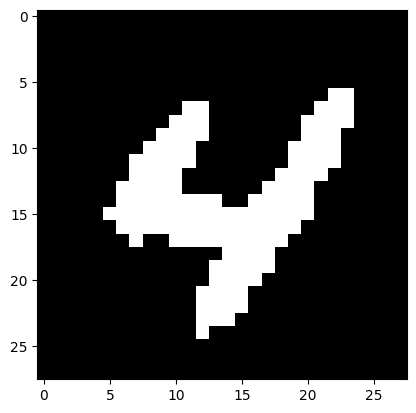

1
1.0


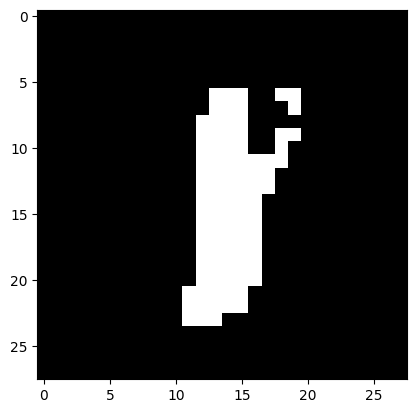

1
1.0


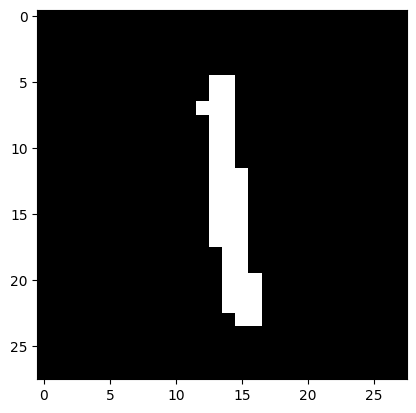

9
1.0


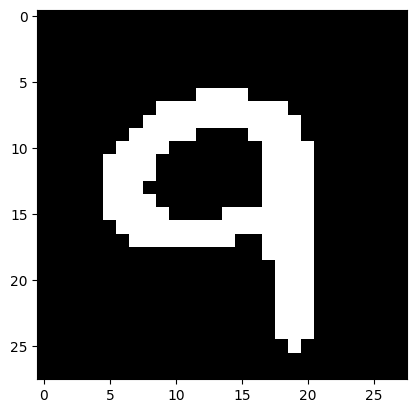

2
1.0


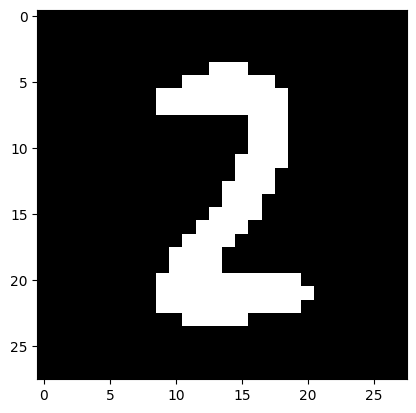

3
1.0


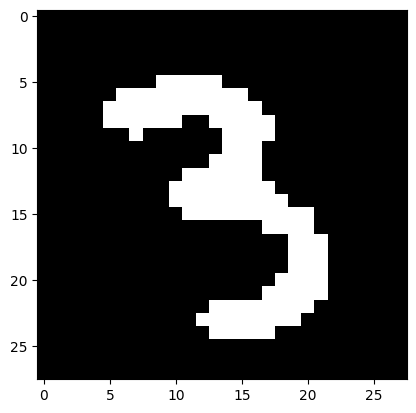

In [16]:
for i in range(10):
    print(loaded_object[i][1])
    plt.imshow(loaded_object[i][0][0], cmap='gray')
    print(loaded_object[i][0][0].max().item())
    plt.show()

In [17]:
from src.global_model_logic import get_dirch_datalaoders
from tqdm import tqdm
from sklearn.metrics import f1_score
from torch.utils.data import DataLoader
from torch.version import cuda
from src.models import ExquisiteNetV1
import torch
from torch import nn, optim
device = 'cuda:0'
print(device)

trainloader= DataLoader(loaded_object, batch_size=32, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=32, shuffle=True)
# Assuming 'model' is your model
model = ExquisiteNetV1(class_num=10, img_channels=1)
model = model.to(device)  # Move model to GPU if available

# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Number of epochs to train the model
n_epochs = 15
train_losses = []
test_losses = []
f1_scores = []
correct_predictions = 0
total_predictions = 0
for epoch in tqdm(range(n_epochs)):
    train_loss = 0.0
    pred_labels = []
    actual_labels = []
    for data, target in trainloader:  # Assuming 'trainloader' is your DataLoader
        data, target = data.to(device), target.to(device)  # Move data to GPU if available

        # Clear the gradients of all optimized variables
        optimizer.zero_grad()

        # Forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        pred_labels.append(output.argmax(dim=1))
        actual_labels.append(target)

        # Calculate the loss
        loss = criterion(output, target)

        # Backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()

        # Perform single optimization step (parameter update)
        optimizer.step()

        # Update running training loss
        train_loss += loss.item() * data.size(0)

    # Switch to evaluation mode
    model.eval()
    with torch.no_grad():
        test_loss = 0.0
        test_pred_labels = []
        test_actual_labels = []
        for data, target in testloader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)
            test_loss += loss.item() * data.size(0)
            test_pred_labels.append(output.argmax(dim=1))
            test_actual_labels.append(target)
             # Compare with actual classes
            total_predictions += output.argmax(dim=1).size(0)
            # correct_predictions += (predicted == labels).sum().item()
            correct_predictions += (output.argmax(dim=1) == target).sum().item()
    # Compute average test loss
    train_loss = train_loss / len(trainloader.dataset)
    test_loss = test_loss / len(testloader.dataset)
    test_losses.append(test_loss)
    train_losses.append(train_loss)
    # Calculate F1 score for the test data
    test_pred_labels = torch.cat(test_pred_labels).to('cpu').numpy()
    test_actual_labels = torch.cat(test_actual_labels).to('cpu').numpy()
    test_f1_score = f1_score(test_actual_labels, test_pred_labels, average='macro')
    f1_scores.append(test_f1_score)
    accuracy = correct_predictions / total_predictions

    print(f'Accuracy: {accuracy * 100}%')
    print('Epoch: {} \tTraining Loss: {:.6f} \t Test Loss: {:.6f} \tF1 Test Macro: {:.6f}'.format(
        epoch + 1,
        train_loss,
        test_loss,
        test_f1_score
    ))

cuda:0


  7%|▋         | 1/15 [00:31<07:24, 31.78s/it]

Accuracy: 75.3%
Epoch: 1 	Training Loss: 0.097606 	 Test Loss: 1.627941 	F1 Test Macro: 0.751536


 13%|█▎        | 2/15 [01:01<06:38, 30.67s/it]

Accuracy: 78.325%
Epoch: 2 	Training Loss: 0.057532 	 Test Loss: 1.258164 	F1 Test Macro: 0.810585


 20%|██        | 3/15 [01:31<06:01, 30.15s/it]

Accuracy: 79.07333333333332%
Epoch: 3 	Training Loss: 0.032815 	 Test Loss: 1.376272 	F1 Test Macro: 0.800755


 27%|██▋       | 4/15 [02:00<05:29, 29.93s/it]

Accuracy: 78.705%
Epoch: 4 	Training Loss: 0.029881 	 Test Loss: 1.582748 	F1 Test Macro: 0.775974


 33%|███▎      | 5/15 [02:30<04:57, 29.78s/it]

Accuracy: 79.494%
Epoch: 5 	Training Loss: 0.029608 	 Test Loss: 1.382075 	F1 Test Macro: 0.826234


 40%|████      | 6/15 [02:59<04:27, 29.70s/it]

Accuracy: 79.365%
Epoch: 6 	Training Loss: 0.022917 	 Test Loss: 1.274264 	F1 Test Macro: 0.784770


 47%|████▋     | 7/15 [03:29<03:58, 29.77s/it]

Accuracy: 79.86%
Epoch: 7 	Training Loss: 0.022082 	 Test Loss: 1.682934 	F1 Test Macro: 0.828008


 53%|█████▎    | 8/15 [03:59<03:28, 29.81s/it]

Accuracy: 80.48875%
Epoch: 8 	Training Loss: 0.016409 	 Test Loss: 1.293758 	F1 Test Macro: 0.847504


 60%|██████    | 9/15 [04:29<02:58, 29.79s/it]

Accuracy: 80.66555555555556%
Epoch: 9 	Training Loss: 0.020348 	 Test Loss: 1.397177 	F1 Test Macro: 0.820808


 67%|██████▋   | 10/15 [04:59<02:28, 29.77s/it]

Accuracy: 80.64099999999999%
Epoch: 10 	Training Loss: 0.015687 	 Test Loss: 1.684255 	F1 Test Macro: 0.803363


 73%|███████▎  | 11/15 [05:28<01:58, 29.71s/it]

Accuracy: 80.81454545454545%
Epoch: 11 	Training Loss: 0.014144 	 Test Loss: 1.306363 	F1 Test Macro: 0.825219


 80%|████████  | 12/15 [05:58<01:29, 29.70s/it]

Accuracy: 80.965%
Epoch: 12 	Training Loss: 0.015517 	 Test Loss: 1.871075 	F1 Test Macro: 0.824375


 87%|████████▋ | 13/15 [06:28<00:59, 29.69s/it]

Accuracy: 80.98923076923077%
Epoch: 13 	Training Loss: 0.011198 	 Test Loss: 1.734829 	F1 Test Macro: 0.814277


 93%|█████████▎| 14/15 [06:57<00:29, 29.73s/it]

Accuracy: 81.20214285714286%
Epoch: 14 	Training Loss: 0.010085 	 Test Loss: 1.360119 	F1 Test Macro: 0.837493


100%|██████████| 15/15 [07:27<00:00, 29.83s/it]

Accuracy: 81.27066666666667%
Epoch: 15 	Training Loss: 0.012854 	 Test Loss: 1.671223 	F1 Test Macro: 0.822749


In [25]:
#This is generated data
# data_loader = torch.utils.data.DataLoader(loaded_object, batch_size=32, shuffle=True)
train_dataset, test_dataset, user_groups = get_dataset(args())
data_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
device = 'cuda:0'

In [26]:
from sklearn.metrics import accuracy_score
import torch

# Assuming that data_loader is the DataLoader for your dataset
correct_predictions = 0
total_predictions = 0
model = torch.load("C:\\Users\\LohithSai\\Desktop\\FederatedImputation\\TheArchive\\global_classifier_experiments\\run_one\\classifier_global_1.0_.pth")
model.eval()
with torch.no_grad():
    for data, labels in data_loader:
        data, labels = data.to(device), labels.to(device)

        # Pass the data to the model
        outputs = model(data)

        # Get the predicted class with the highest score
        _, predicted = torch.max(outputs.data, 1)

        # Compare with actual classes
        total_predictions += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

accuracy = correct_predictions / total_predictions

print(f'Accuracy: {accuracy * 100}%')

Accuracy: 77.23833333333333%


In [41]:
torch.save(model, "cvae_model_federated.pth")

In [25]:
len(loaded_object)

70000

In [20]:
# plt.imshow(loaded_object[33][0][0], cmap='gray')
# plt.show()
# plt.imshow(test_dataset[1][0][0], cmap='gray')
loaded_object[33][0][0]

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
  